In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex'    : ['M', 'F', np.nan, 'M', 'F'],
                   'score'  : [5, 4, 3, 4, np.nan]})
df


,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [ ]:
pd.isna(df) # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isna(df).sum() # 결측치 빈도 확인

sex      1
score    1
dtype: int64

In [ ]:
df.dropna(subset = 'score') # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [ ]:
df_nomiss = df.dropna(subset = 'score') # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1 # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [9]:
df_nomiss = df.dropna(subset = ['sex', 'score']) # 성, 점수 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [10]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [12]:
df['score'].mean()

np.float64(4.0)

In [13]:
df['score'].sum()

np.float64(16.0)

In [14]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [15]:
exam = pd.read_csv('exam.csv') # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan # 2, 7, 14 행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [16]:
exam['math'].mean()

np.float64(55.23529411764706)

In [17]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [18]:
# 혼자서 해보기
mpg = pd.read_csv('mpg.csv')

# NaN 할당하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [20]:
# 1
pd.isna(mpg).sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             5
fl              0
category        0
dtype: int64

In [ ]:
# hwy에 결측치 있는 행만 출력하기
mpg[pd.isna(mpg)['hwy']]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,NaN,r,suv
130,land rover,range rover,4.0,1999,8,auto(l4),4,11,NaN,p,suv
152,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,NaN,p,suv
211,volkswagen,gti,2.8,1999,6,manual(m5),f,17,NaN,r,compact


In [39]:
# 제거해도 되겠다. 제거하자.
# 제거하고 어떤 구동방식의 hwy 평균이 높은지 확인하기
mpg.dropna(subset= ['hwy']) \
   .groupby('drv', as_index= False) \
   .agg(mean_hwy = ('hwy', 'mean')) \
   .sort_values('mean_hwy', ascending= False)

,drv,mean_hwy
1,f,28.200000
2,r,21.000000
0,4,19.242424


In [42]:
df = pd.DataFrame({'sex'    : [1, 2, 1, 3, 2, 1],
                   'score'  : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [44]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [47]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [52]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [53]:
# score가 5보다 크면 NaN부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [54]:
df.dropna(subset = ['sex', 'score']) \
  .groupby('sex') \
  .agg(score_mean = ('score', 'mean'))

,score_mean
sex,
1.0,4.0
2.0,3.0


In [59]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df

,x1
0,1
1,1
2,2
3,2


In [69]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'ect') # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,a
1,1,a
2,2,ect
3,2,ect


In [71]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', '결측치')
df

,x1,x2
0,1,a
1,1,a
2,2,결측치
3,2,결측치


In [74]:
df['x2'] = df['x2'].replace('결측치', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


<Axes: ylabel='hwy'>

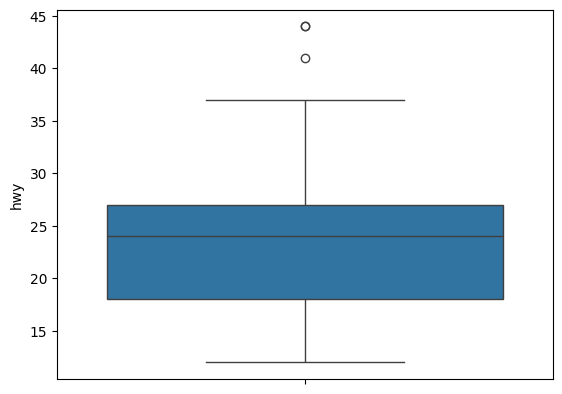

In [75]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [77]:
pct25 = mpg['hwy'].quantile(.25)
pct25

np.float64(18.0)

In [78]:
pct75 = mpg['hwy'].quantile(.75)
pct75

np.float64(27.0)

In [79]:
iqr = pct75- pct25
iqr

np.float64(9.0)

In [80]:
pct25 - 1.5 * iqr

np.float64(4.5)

In [81]:
pct75 + 1.5 * iqr

np.float64(40.5)

In [85]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

np.int64(3)

In [89]:
mpg.shape

(234, 11)

In [90]:
mpg.dropna(subset = 'hwy') \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [106]:
# 혼자서 해보기
# mpg 데이터를 불러와 일부러 이상치 만들기
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [107]:
# 1
# drv 이상치 확인하기
mpg['drv'].value_counts()
# 들어갈 수 없는 k값이 있다.

drv
f    106
4    100
r     24
k      4
Name: count, dtype: int64

In [108]:
# 결측처리 하자
mpg['drv'] = np.where(mpg['drv'].isin(['f', '4', 'r']), mpg['drv'], '이상치')
mpg['drv'].value_counts()

drv
f      106
4      100
r       24
이상치      4
Name: count, dtype: int64

In [109]:
mpg['drv'] = mpg['drv'].replace('이상치', np.nan)
mpg['drv'].value_counts()

drv
f    106
4    100
r     24
Name: count, dtype: int64

In [110]:
mpg['drv'].isna().sum() # 잘 바뀌었군.

np.int64(4)

<Axes: ylabel='cty'>

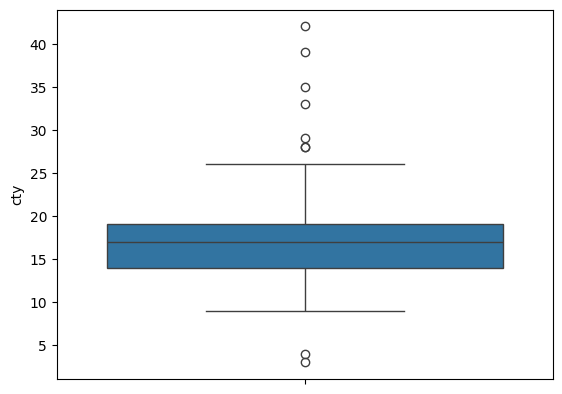

In [111]:
# 2
import seaborn as sns
sns.boxplot(mpg['cty'])

In [116]:
pct25 = mpg['cty'].quantile(0.25)
pct75 = mpg['cty'].quantile(0.75)
iqr = pct75 - pct25
mpg['cty'] = np.where((mpg['cty'] < pct25 - 1.5 * iqr) | (mpg['cty'] > pct75 + 1.5 * iqr), np.nan, mpg['cty'])

<Axes: ylabel='cty'>

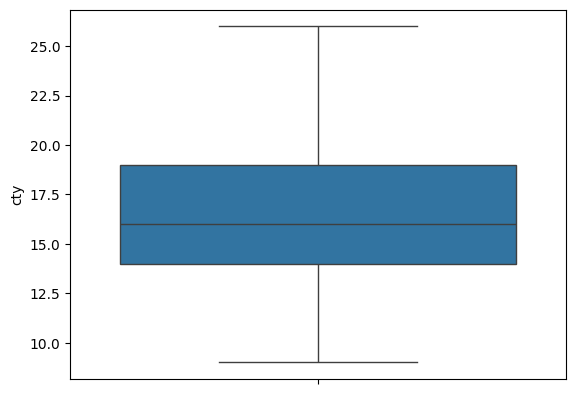

In [117]:
sns.boxplot(mpg['cty'])

In [127]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             4
cty             9
hwy             0
fl              0
category        0
dtype: int64

In [128]:
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv') \
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
